# Imports

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
sns.set()


# Read the Dataset

In [8]:
df = pd.read_csv('iFood_data.csv', sep=',') # In this file, the separator is ";" instead of ","
print(df.shape)
pd.set_option('display.max_columns', 32)
df = df.drop_duplicates(subset=df.columns.difference(['ID']), keep='first')
df.shape

(2240, 29)


(2058, 29)

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [10]:
df['Response'].sum()

np.int64(313)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2058 non-null   int64  
 1   Year_Birth           2058 non-null   int64  
 2   Education            2058 non-null   object 
 3   Marital_Status       2058 non-null   object 
 4   Income               2034 non-null   float64
 5   Kidhome              2058 non-null   int64  
 6   Teenhome             2058 non-null   int64  
 7   Dt_Customer          2058 non-null   object 
 8   Recency              2058 non-null   int64  
 9   MntWines             2058 non-null   int64  
 10  MntFruits            2058 non-null   int64  
 11  MntMeatProducts      2058 non-null   int64  
 12  MntFishProducts      2058 non-null   int64  
 13  MntSweetProducts     2058 non-null   int64  
 14  MntGoldProds         2058 non-null   int64  
 15  NumDealsPurchases    2058 non-null   int64 

# Data Preprocessing | Feature Engineering


In [12]:
#Creating Responsiveness feature
df['Responsiveness'] = (df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5'])/5

# Living_With based on Marital_Status
df["LivesWithPartner"]=df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0, "Alone":0})


#Creating Age feature from Birth Year
df['Age']=2014 - df['Year_Birth']

#Creating total spent column -> total amount spent on pruducts
df['TotalSpent']=(df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'])

#Creating feature 'Total Purchases', which is the sum of purchases across all platforms
df['TotalPurchases']=(df['NumWebPurchases'] + df['NumCatalogPurchases']+df['NumStorePurchases'])

#Creating Averagespent column
df['AverageSpent']=(df['TotalSpent']/df['TotalPurchases'] )

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].astype('int64')//10**9 # Date in epoch time

C:\Users\User\AppData\Local\Temp\ipykernel_10184\570805005.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["LivesWithPartner"]=df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0, "Alone":0})


#Modifying Columns


In [13]:
#Mofifying column Education, replacing '2n Cycle' values to 'Master'

df['Education'] = df['Education'].replace('2n Cycle','Master')
df['Education'] = df['Education'].replace('Graduation','Bachelor')
df['Education'] = df['Education'].replace('Basic','HighSchool')
education = pd.DataFrame(df.groupby(by='Education').size())
education = education.reset_index()
education.rename(columns={0:'Count'}, inplace=True)


In [14]:
#OrdinalEncoding Education
education_order = ['HighSchool', 'Bachelor', 'Master', 'PhD']
encoder = OrdinalEncoder(categories=[education_order])
df['EducationEncoded'] = encoder.fit_transform(df[['Education']])

### Dropping unnecessary columns

In [15]:
#Dropping unnecessary columns
df.drop(columns=[ "Year_Birth", "Marital_Status", "Z_Revenue", "Z_CostContact"], inplace = True) #we deleted Z_Revenue and Z_CostContact because they contain only a single value Z_Revenue = 3 and Z_CostContact= 11
df.rename(columns = {'Response': 'AcceptedCmp6', "Dt_Customer": "JoinDateEpochTime"}, inplace = True)
df.drop(columns=['ID'], inplace=True) # We dropped the ID values, because they are not relevant in our further work

avginf = df[df['TotalPurchases']==0] # Dropping columns with 0 Total purchases -> nor relevant
df.drop(avginf.index, inplace=True)

## Data Exploration

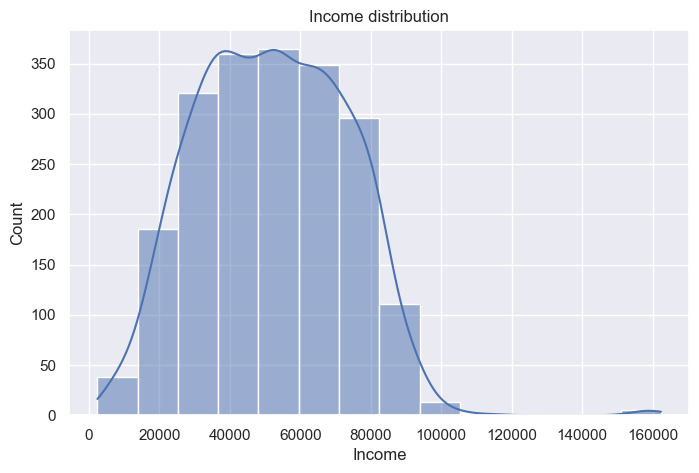

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins = 14, kde=True)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income distribution")
plt.show()

The plot tells, that there are a few outliers, other than that it is a clearly visible bell shaped distribution


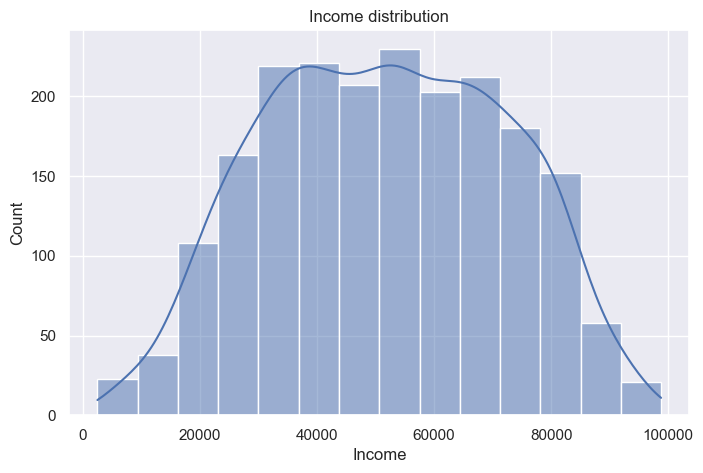

In [52]:
df = df.loc[df['Income']<=100000]

plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins = 14, kde=True)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income distribution")
plt.show()

In [16]:
#Distribution of Responsiveness

responsiveness=pd.DataFrame(df.groupby(by='Responsiveness').size())
responsiveness.reset_index()
responsiveness=responsiveness.rename(columns={0: 'Count'}).reset_index()
responsiveness.sort_values(by='Responsiveness', ascending=True)

,Responsiveness,Count
0,0.0,1627
1,0.2,304
2,0.4,77
3,0.6,40
4,0.8,10


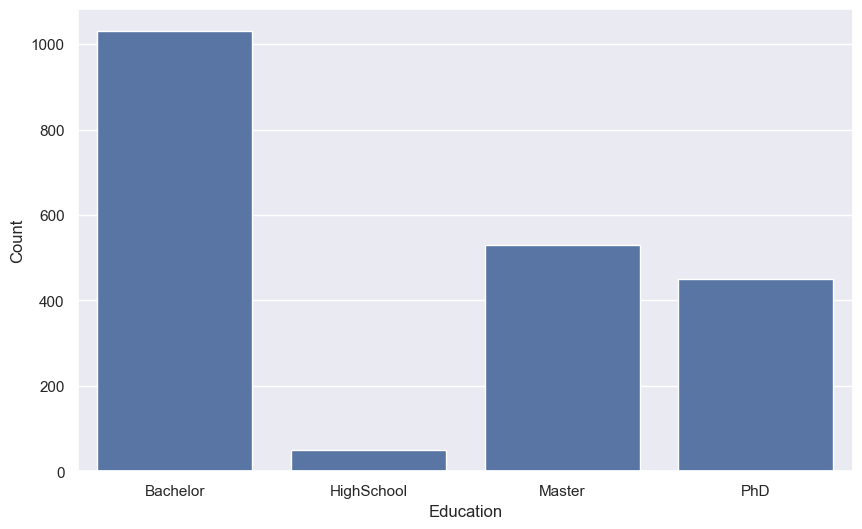

In [41]:
#Distribution of Education
plt.figure(figsize=(10,6))
sns.barplot(x='Education', y='Count', data=education)
plt.show()

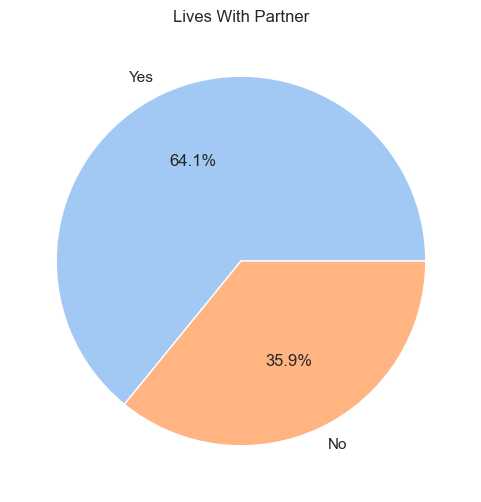

In [65]:
partner_dist = df['LivesWithPartner'].value_counts()
partner_df = pd.DataFrame(partner_dist).reset_index()


plt.figure(figsize=(6, 6))
plt.pie(partner_df['count'], labels=['Yes', 'No'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Lives With Partner")
plt.show()


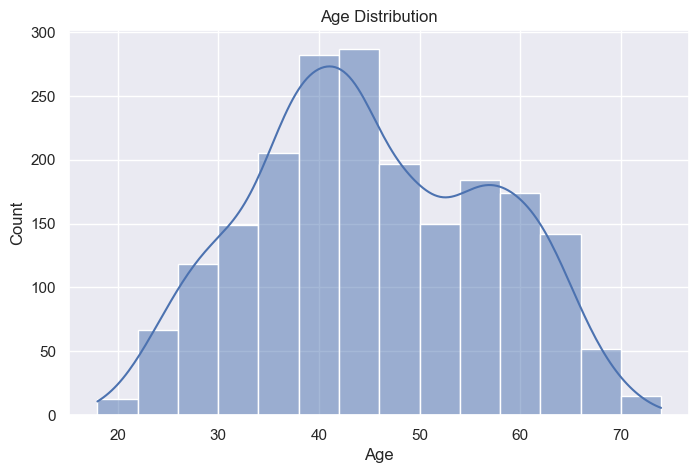

In [71]:
df = df[df['Age']<100]
df = df.drop_duplicates()

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins = 14, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

In [25]:
asd = df.groupby(by="Education")
print(asd['Income'].mean())
df['Income'] = df['Income'].fillna(df['Income'].mean())

Education
Bachelor      52957.523576
HighSchool    19913.346939
Master        51205.522158
PhD           55960.966063
Name: Income, dtype: float64


In [27]:
asd = df.groupby(by="Education")
asd['Income'].mean()

Education
Bachelor      52354.194387
HighSchool    19913.346939
Master        51223.128624
PhD           55920.746623
Name: Income, dtype: float64

In [29]:
df.drop(columns=['Education'], inplace=True) # Won't need after visualization, already encoded
df.head()
df = df.fillna(0)

,Income,Kidhome,Teenhome,JoinDateEpochTime,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Responsiveness,LivesWithPartner,Age,TotalSpent,TotalPurchases,AverageSpent,EducationEncoded
0,58138.0,0,0,1346716800,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0.0,0,57,1617,22,73.500000,1.0
1,46344.0,1,1,1394236800,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0.0,0,60,27,4,6.750000,1.0
2,71613.0,0,0,1377043200,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0.0,1,49,776,20,38.800000,1.0
3,26646.0,1,0,1391990400,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0.0,1,30,53,6,8.833333,1.0
4,58293.0,1,0,1390089600,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0.0,1,33,422,14,30.142857,3.0


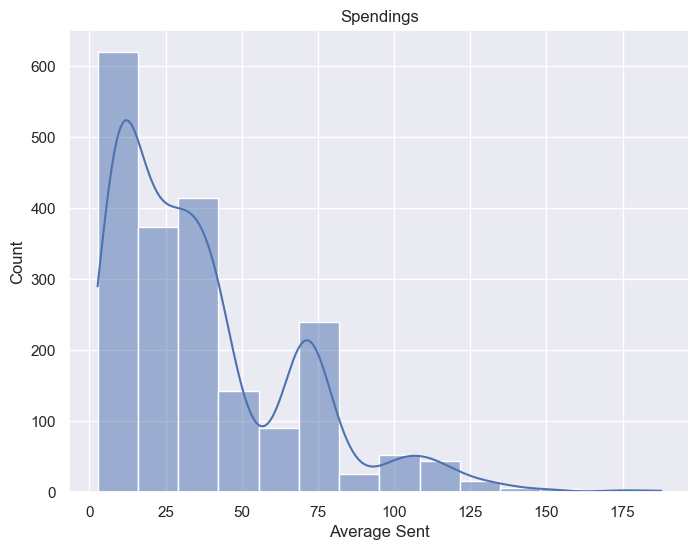

In [74]:
df = df[df['AverageSpent']<200]

plt.figure(figsize=(8,6))
sns.histplot(df['AverageSpent'],bins=14, kde=True)
plt.xlabel("Average Sent")
plt.ylabel("Count")
plt.title("Spendings")
plt.show()

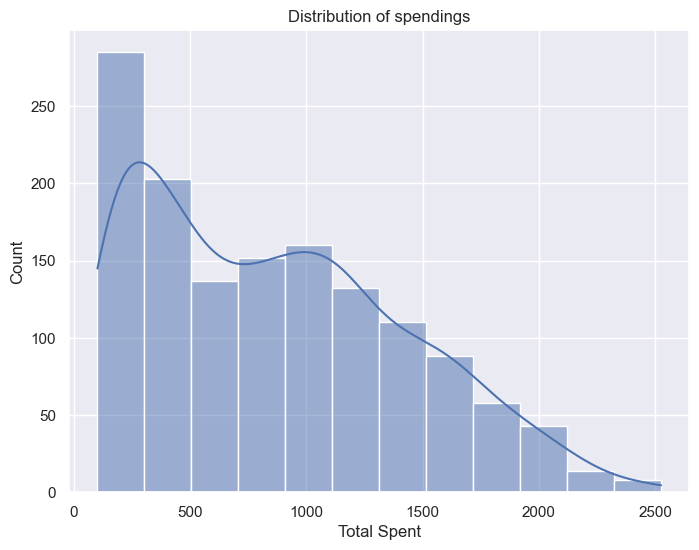

In [79]:
df_spend_more_than_zero = df[df['TotalSpent']>100]
plt.figure(figsize=(8,6))
sns.histplot(df_spend_more_than_zero['TotalSpent'], bins=12, kde=True)
plt.xlabel("Total Spent")
plt.ylabel("Count")
plt.title("Distribution of spendings")

plt.show()

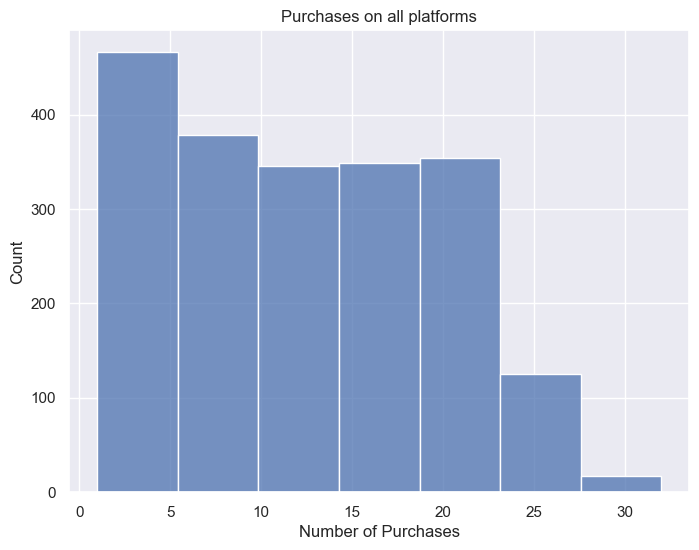

In [82]:
plt.figure(figsize=(8,6))
sns.histplot(df['TotalPurchases'], bins=7)
plt.xlabel("Number of Purchases")
plt.title("Purchases on all platforms")

plt.show()